# JS06: ANN (APPROXIMATE NEAREST NEIGHBORS)

## Praktikum 1: ANNOY

In [2]:
# Install annoy
!pip install annoy

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 9.8104 ms

Annoy NN index: [7452, 64040, 72632]
Annoy NN jarak: [np.float64(24.316939817614458), np.float64(0.0), np.float64(58.54488164032053)]
Waktu Annoy: 0.1347 ms


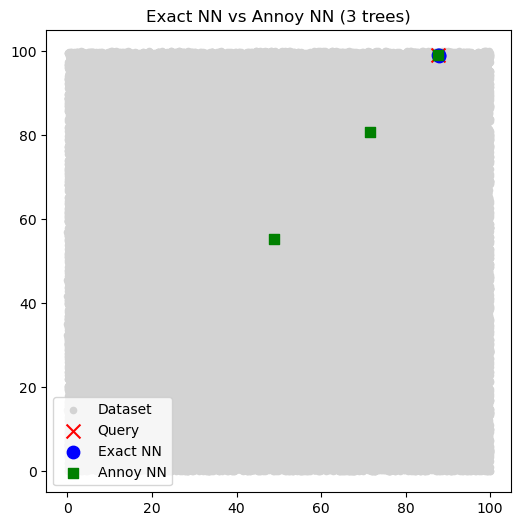

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100_000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Lakukan percobaan

In [23]:
import pandas as pd

# Data percobaan
data = [
    ["Euclidean", 3, 1000, "[219 898 593], [219, 898, 593]", "3.7985 , 0.258"],
    ["Euclidean", 8, 1000, "[219 898 593], [219, 898, 593]", "1.7574 , 0.2415"],
    ["Euclidean", 3, 100000, "[64040 64186 88792], [64040, 64186, 88792]", "14.3383 , 0.4792"],
    ["Angular", 3, 1000, "[219 898 593], [219, 429, 962]", "1.8897, 0.2887"],
    ["Angular", 8, 1000, "[219 898 593], [219, 429, 540]", "1.6811, 1.3344"],
    ["Angular", 3, 100000, "[64040 64186 88792], [7452, 64040, 72632]", "9.8104, 0.1347"],
]

# Buat DataFrame pandas
df = pd.DataFrame(data, columns=[
    "Distance Metrics", "Tree", "Jumlah data",
    "Hasil Index terdekat ENN vs ANN", "Waktu komputasi Vs (ENN, ANN)"
])

# Tampilkan tabel
print(df.to_string(index=False))


Distance Metrics  Tree  Jumlah data            Hasil Index terdekat ENN vs ANN Waktu komputasi Vs (ENN, ANN)
       Euclidean     3         1000             [219 898 593], [219, 898, 593]                3.7985 , 0.258
       Euclidean     8         1000             [219 898 593], [219, 898, 593]               1.7574 , 0.2415
       Euclidean     3       100000 [64040 64186 88792], [64040, 64186, 88792]              14.3383 , 0.4792
         Angular     3         1000             [219 898 593], [219, 429, 962]                1.8897, 0.2887
         Angular     8         1000             [219 898 593], [219, 429, 540]                1.6811, 1.3344
         Angular     3       100000  [64040 64186 88792], [7452, 64040, 72632]                9.8104, 0.1347


Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

--> Saya hanya menggunakan 500.000 tracks

In [26]:
from sklearn.metrics.pairwise import euclidean_distances

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 5000_000   # 500 rb track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [4721683 4679021 2082649 4234882 1478025]
Exact NN time: 1.07 seconds
Annoy result: [3960884, 997677, 1241086, 1542494, 2539294]
Annoy time: 0.008 seconds


In [27]:
# Data percobaan
data = [
    ["Euclidean", 3, 5000000, "[4829004 2431159 2473476 3941481 2882127], [4829004 2431159 2473476 3941481 2882127]", "1.226 , 0.006"],
    ["Angular", 8, 5000000, "[4721683 4679021 2082649 4234882 1478025], [3960884, 997677, 1241086, 1542494, 2539294]", "1.07 , 0.008"],
]

# Buat DataFrame pandas
df = pd.DataFrame(data, columns=[
    "Distance Metrics", "Tree", "Jumlah data",
    "Hasil Index terdekat ENN vs ANN", "Waktu komputasi Vs (ENN, ANN)"
])

# Tampilkan tabel
print(df.to_string(index=False))

Distance Metrics  Tree  Jumlah data                                                         Hasil Index terdekat ENN vs ANN Waktu komputasi Vs (ENN, ANN)
       Euclidean     3      5000000    [4829004 2431159 2473476 3941481 2882127], [4829004 2431159 2473476 3941481 2882127]                 1.226 , 0.006
         Angular     8      5000000 [4721683 4679021 2082649 4234882 1478025], [3960884, 997677, 1241086, 1542494, 2539294]                  1.07 , 0.008


Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya? 

*Jawab*: Bagian build index (yaitu `annoy_index.build(n_trees)`) tidak dihitung waktunya karena proses itu bukan bagian dari pencarian (query time) — tapi bagian dari persiapan / indexing time.